# find object

In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## get input

In [87]:
image = Image.open('data/input.jpg').convert('LA')

In [88]:
# convert inputs
image_arr = np.asarray(image)
image_arr = image_arr[:,:,0]

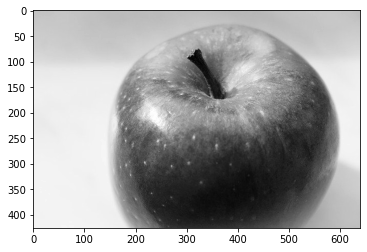

In [89]:
# show input
plt.imshow(image_arr, cmap='gray', vmin=0, vmax=255)
plt.show()

## get histogram

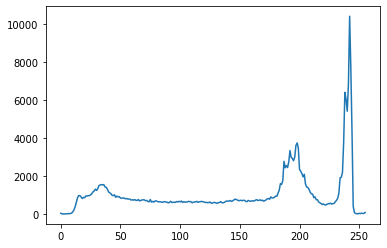

In [90]:
hist = cv2.calcHist([image_arr], [0], None, [256], [0, 256])
hist_flat = hist.flatten()
plt.plot(hist)
plt.savefig('result/hist.png')
plt.show()

## start separating object from background

In [91]:
start_threshold = 75
object_u = hist_flat[:start_threshold].argmax()
background_u = hist_flat[start_threshold:].argmax() + start_threshold
(object_u, background_u)

(36, 242)

In [92]:
object_sigma = 1 / (math.sqrt(2 * math.pi) * object_u)
background_sigma = 1 / (math.sqrt(2 * math.pi) * background_u)
(object_sigma, background_sigma)

(0.011081730011150908, 0.001648521819840631)

In [93]:
object_a = hist_flat[start_threshold:].max()
background_a = hist_flat[:start_threshold].max()
(object_a, background_a)

(10403.0, 1557.0)

In [94]:
theta = (object_sigma * object_a) / (object_sigma * object_a + background_sigma * background_a)
theta

0.9782202054882347

In [95]:
threshold = (object_u + background_u) / 2 \
            - ((object_sigma + background_sigma) ** 2 / (background_u - object_u)) \
            * math.log2((1 - theta) / theta)
threshold

139.00000431824895

In [96]:
background = image_arr > threshold
result = np.copy(image_arr)# result.setflags(write=1)
result[background] = 255

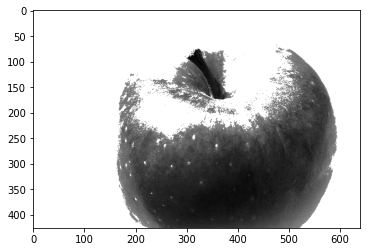

In [97]:
result = result.reshape(image_arr.shape)
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

In [98]:
cv2.imwrite('result/result.png',result)

True